In [1]:
import pandas as pd
import numpy as np
import random
import math
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")

In [29]:
data_raw_sps = "../data/raw_packets_obernach_SPS_20S01_0.5M01_0.03G02_0.03G01_5020.vlnd"
data_raw_spg = "../data/raw_packets_obernach_GP_0.02_2510.vlnd"
data_raw_mpa = "../data/raw_packets_obernach_MP_0.24_2510.vlnd"

In [30]:
def df_coverter(data):
    with open(data) as f:
        lines = f.readlines()
    raw = pd.DataFrame(lines) 
    df = raw[0].str.split(' ', expand=True)
    return df

In [31]:
df_raw_sps = df_coverter(data_raw_sps)
df_raw_spg =df_coverter(data_raw_spg)
df_raw_mpa =df_coverter(data_raw_mpa)

In [32]:
def random_measurements(df_raw_sps,k=1):
    
    ar_raw_sps = np.array(df_raw_sps)
    random_value = random.choices(ar_raw_sps,k=k)
    datum = np.array(random_value)[:,0]
    zeit = np.array(random_value)[:,1]
    ## Test number
    test_no = np.array(random_value)[:,2]
    ## Sensor type
    sensor = np.array(random_value)[:,3]
    ## Measurements
    package = np.array(random_value)[:,4:]
    package = list(package)
    
    plot_nr = 1
    figure(figsize=(20, k))
    for rand_val in package:
        length = []
        for i in range(len(rand_val)):
            length.append(i)
        
        plt.subplot(int(math.ceil(len(package)/5)), 5, plot_nr)
        p = sns.lineplot(length,np.asarray(rand_val,dtype=np.float64))
        plt.axhline(y=0, color='grey', linestyle='--')
        p.set_title('Sensor: {} / Measurement: {} \nDate: {}/{}'.format(sensor[plot_nr-1],test_no[plot_nr-1],datum[plot_nr-1],zeit[plot_nr-1]),fontsize=11)
        plot_nr +=1

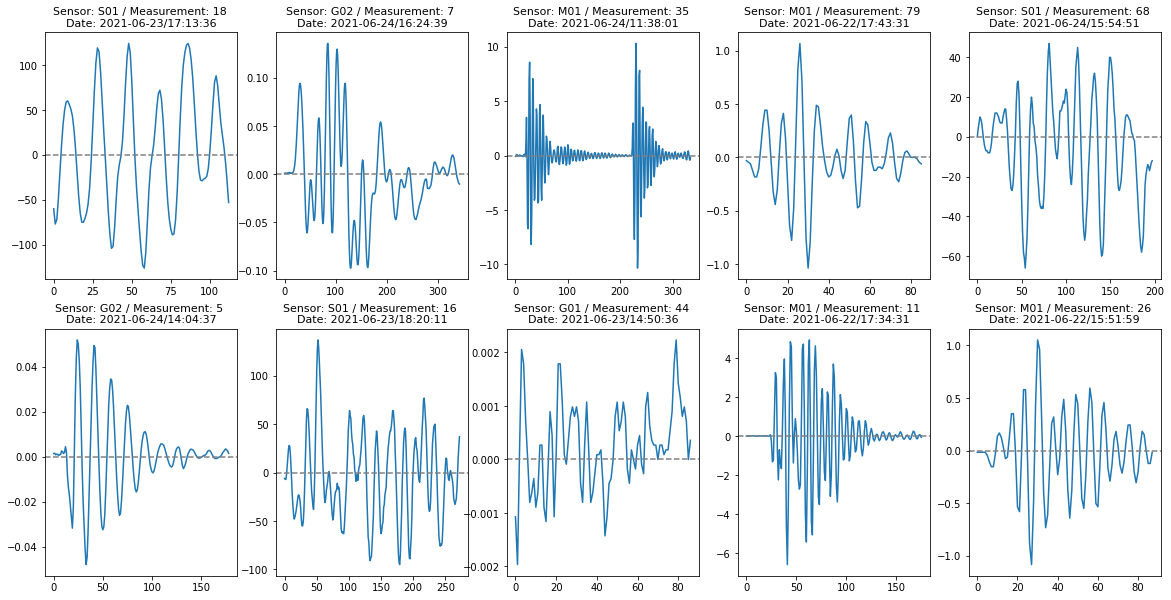

In [208]:
random_measurements(df_raw_sps,k=10)

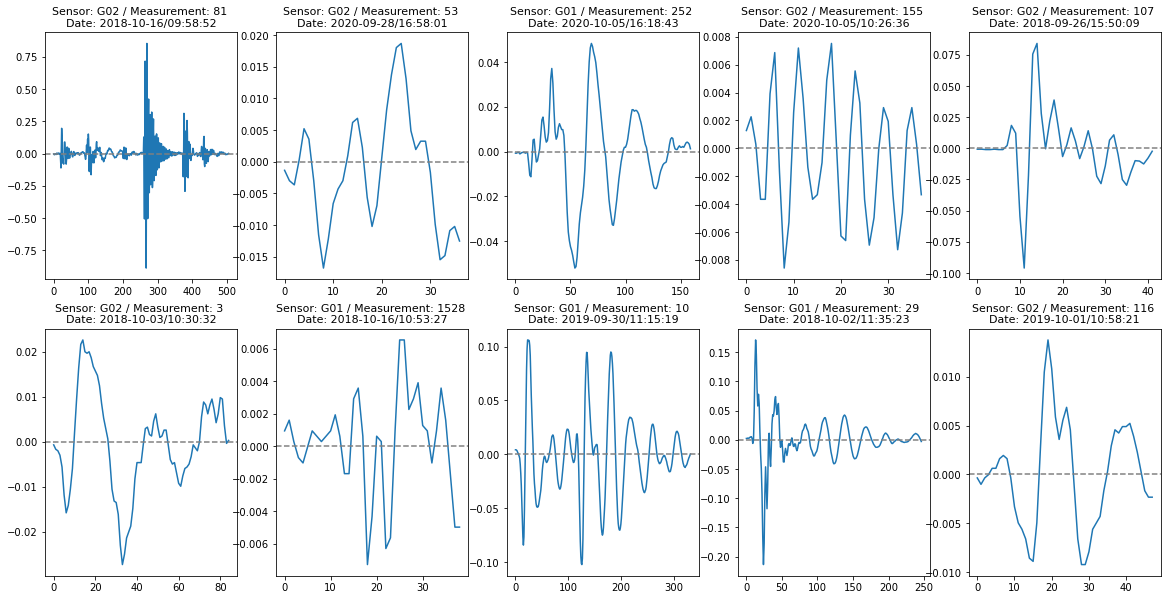

In [211]:
random_measurements(df_raw_spg,k=10)

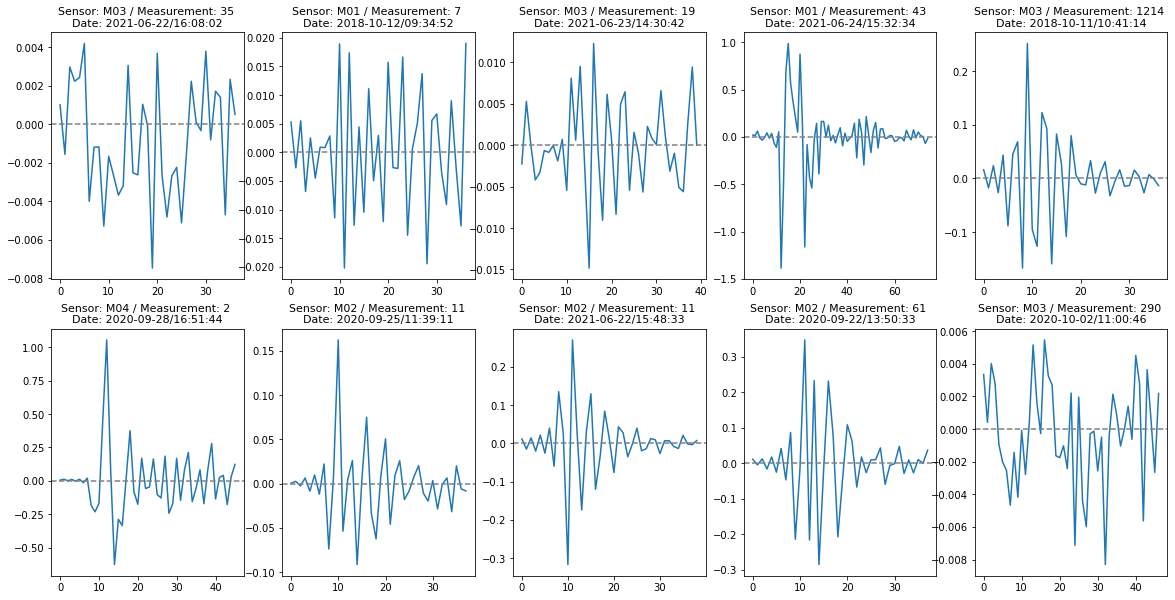

In [215]:
random_measurements(df_raw_mpa,k=10)